In [1]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table

In [2]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [3]:
roc_curve = RocCurveDisplay.from_estimator # shorthand

# 9.6.1 Support Vector Classifier

### Using data that isn't linearly seperable

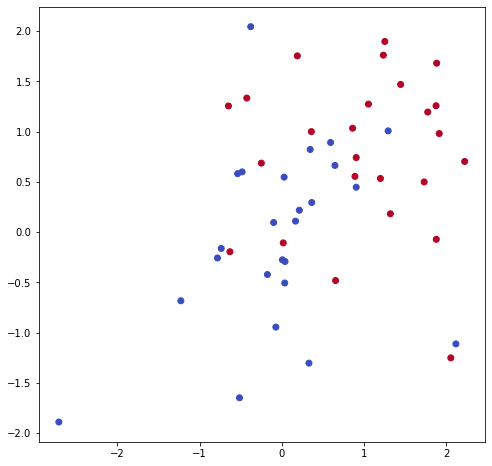

In [4]:
# using 2D data
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);

In [5]:
# fitting classifier with linear kernel
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X, y)

SVC(C=10, kernel='linear')

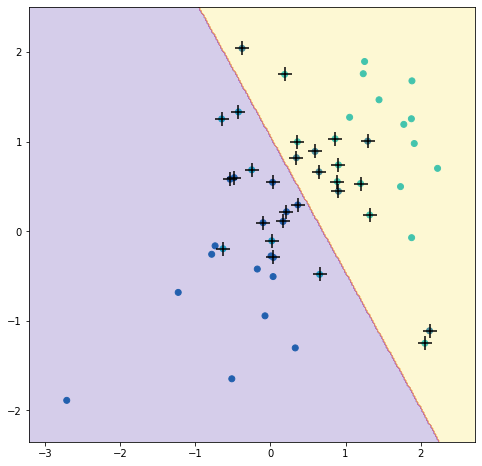

In [6]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear ,
         ax=ax)

When C (cost) is small, margins will be wide and more support vectors will lie on the margin or on the wrong side of the hyperplane

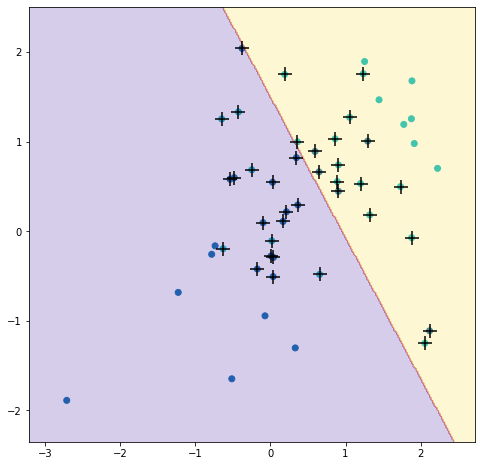

In [7]:
# using a smaller value of C
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear_small ,
         ax=ax)

We can now see a larger number of support vectors

In [8]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [9]:
# cv to get best C value
kfold = skm.KFold(5,
                  random_state=0,
                  shuffle=True)
grid = skm.GridSearchCV(svm_linear ,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        refit=True ,
                        cv=kfold ,
                        scoring='accuracy')
grid.fit(X, y)
grid.best_params_

{'C': 1}

In [10]:
# cross validation accuracy for each value of C
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [11]:
# generating test data
X_test = rng.standard_normal((20, 2))
y_test = np.array ([ -1]*10+[1]*10)
X_test[y_test==1] += 1

In [12]:
# using best model to make predictions
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


In [13]:
# test accuracy
14/20

0.7

In [14]:
# results for C=0.001
svm_ = SVC(C=0.001,
kernel='linear').fit(X, y)
y_test_hat = svm_.predict(X_test)
confusion_table(y_test_hat , y_test)

Truth,-1,1
Predicted,,
-1,2,0
1,8,10


In [15]:
12/20

0.6

### Using Linearly Seperable data

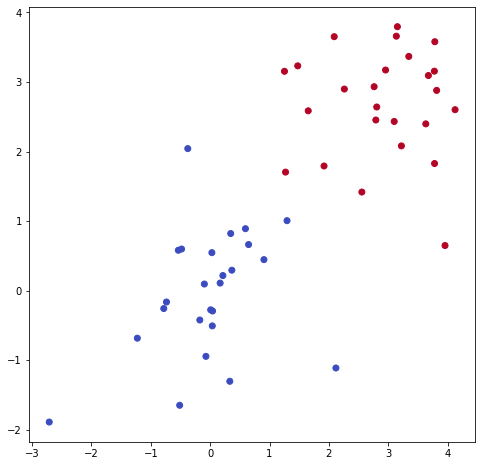

In [16]:
X[y==1] += 1.9;
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

In [17]:
svm_ = SVC(C=1e5, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


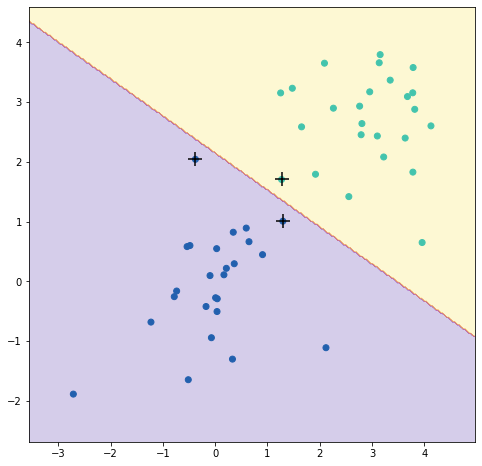

In [18]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_ ,
         ax=ax)

In [19]:
# a smaller value of C
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
confusion_table(y_hat , y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


When using a large value of C, the margin is very small. As seen from the plot, there are only 3 support vectors. This could be an overfit to the training data.

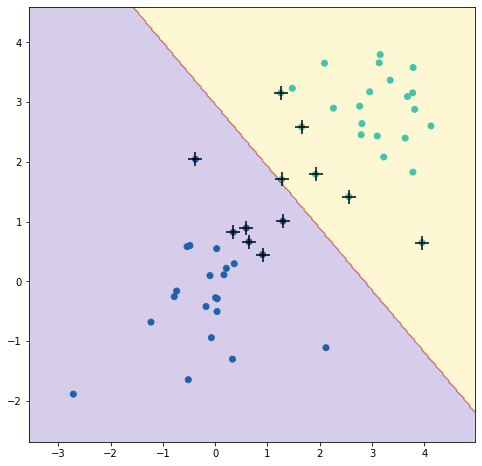

In [20]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_ ,
         ax=ax)

With a larger value of C, the margin is bigger and the results might be more stable

# 9.6.2 Support Vector Machine

In [21]:
# generating data
# not linearly seperable
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

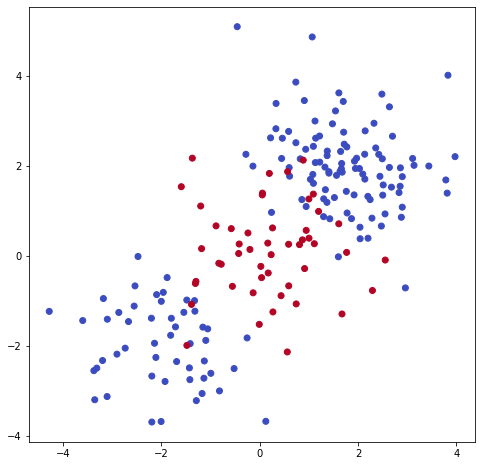

In [24]:
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
cmap=cm.coolwarm);

In [25]:
# using a radial kernel
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.5,
                               random_state=0)
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X_train , y_train)

SVC(C=1, gamma=1)

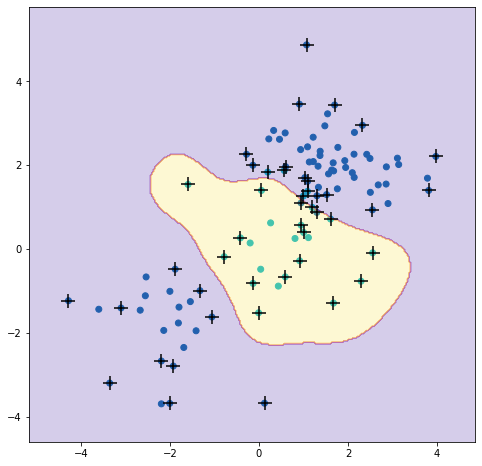

In [26]:
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         svm_rbf ,
         ax=ax)

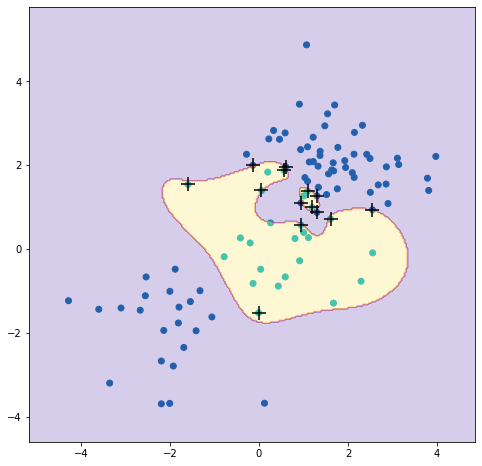

In [27]:
# using a larger value of C
svm_rbf = SVC(kernel="rbf", gamma=1, C=1e5)
svm_rbf.fit(X_train , y_train)
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         svm_rbf ,
         ax=ax)

In [28]:
# using grid search 
kfold = skm.KFold(5,
                 random_state=0,
                 shuffle=True)
grid = skm.GridSearchCV(svm_rbf ,
                        {'C':[0.1,1,10,100,1000],
                        'gamma':[0.5,1,2,3,4]},
                        refit=True ,
                        cv=kfold ,
                        scoring='accuracy');
grid.fit(X_train , y_train)
grid.best_params_

{'C': 1, 'gamma': 0.5}

Truth,1,2
Predicted,,
1,69,6
2,6,19


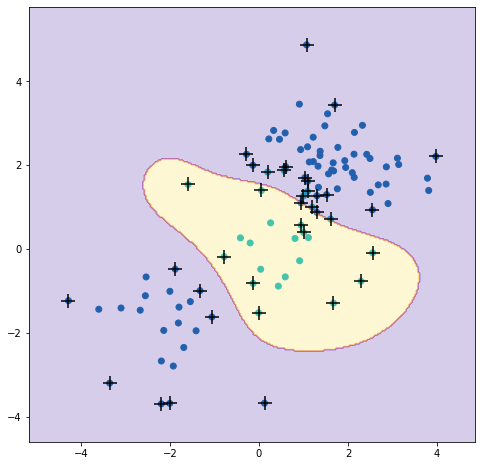

In [29]:
best_svm = grid.best_estimator_
fig , ax = subplots(figsize=(8,8))
plot_svm(X_train ,
         y_train ,
         best_svm ,
         ax=ax)
y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test , y_test)

# 9.6.3 ROC Curves

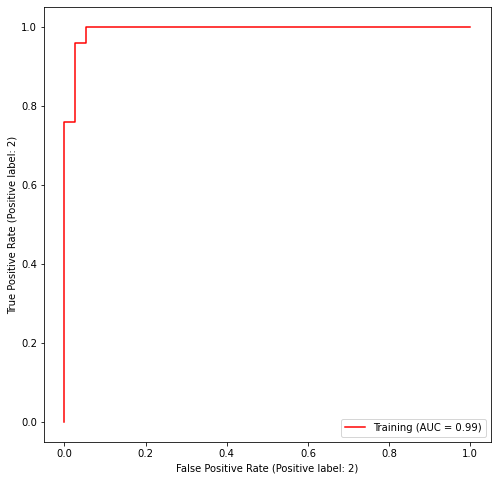

In [30]:
# ROC curve for different thresholds
fig , ax = subplots(figsize=(8,8))
roc_curve(best_svm ,
          X_train ,
          y_train ,
          name='Training',
          color='r',
          ax=ax);

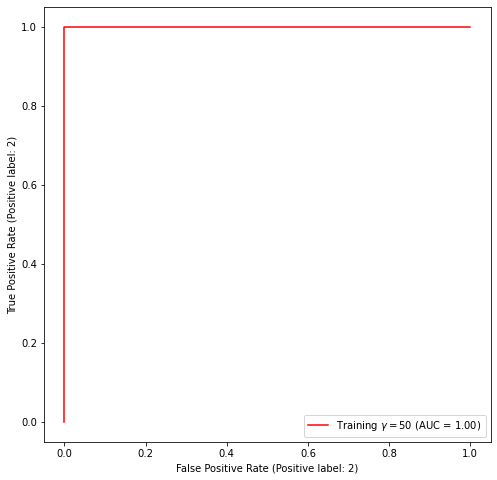

In [31]:
# increasing gamma
svm_flex = SVC(kernel="rbf",
               gamma=50,
               C=1)
svm_flex.fit(X_train , y_train)
fig , ax = subplots(figsize=(8,8))
roc_curve(svm_flex ,
          X_train ,
          y_train ,
          name='Training $\gamma=50$',
          color='r',
          ax=ax);  

In [34]:
# ROC curve on test data
roc_curve(svm_flex ,
          X_test ,
          y_test ,
          name='Test $\gamma=50$',
          color='b',
          ax=ax)
fig;

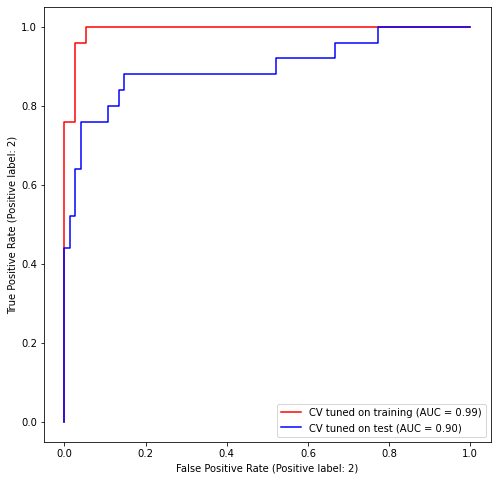

In [35]:
fig , ax = subplots(figsize=(8,8))
for (X_, y_, c, name) in zip(
    (X_train , X_test),
    (y_train , y_test),
    ('r', 'b'),
    ('CV tuned on training',
    'CV tuned on test')):
    roc_curve(best_svm ,
              X_,
              y_,
              name=name ,
              ax=ax,
              color=c)

# 9.6.4 SVM with Multiple Classes

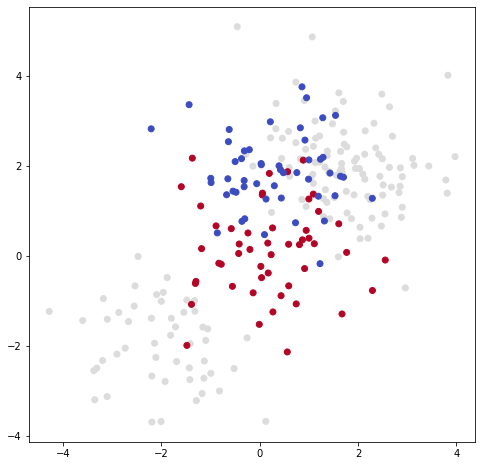

In [36]:
# generating data
rng = np.random.default_rng (123)
X = np.vstack([X, rng.standard_normal((50, 2))])
y = np.hstack([y, [0]*50])
X[y==0,1] += 2
fig , ax = subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm);

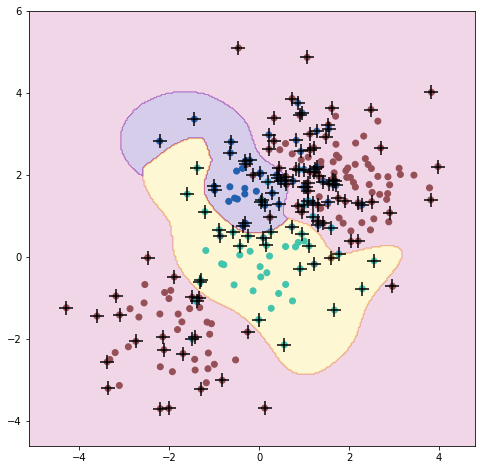

In [37]:
# using one-versus-one approach
svm_rbf_3 = SVC(kernel="rbf",
                C=10,
                gamma=1,
                decision_function_shape='ovo');
svm_rbf_3.fit(X, y)
fig , ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf_3 ,
         scatter_cmap=cm.tab10 ,
         ax=ax)

# 9.6.5 Application to Gene Expression Data

In [38]:
# data to predict cancer subtype
Khan = load_data('Khan')
Khan['xtrain'].shape , Khan['xtest'].shape

((63, 2308), (20, 2308))

In [42]:
Khan['ytrain'].value_counts()

2    23
4    20
3    12
1     8
Name: Y, dtype: int64

In [43]:
# using a linear fit
khan_linear = SVC(kernel='linear', C=10)
khan_linear.fit(Khan['xtrain'], Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),
                Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [45]:
# test set performance
confusion_table(khan_linear.predict(Khan['xtest']),
                                    Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


Using C=10 produces 2 test set errors